# Battery Electric Vehicle Charging

In this example a battery electric vehicle (BEV) is driven 100 km in the morning and 100 km in the evening, to simulate commuting, and charged during the day by a solar panel at the driver's place of work. The size of the panel is computed by the optimisation.

The BEV has a battery of size 100 kWh and an electricity consumption of 0.18 kWh/km.

**NB:** this example will use units of kW and kWh, unlike the PyPSA defaults

In [ ]:
!pip install pypsa
!conda install -c conda-forge cartopy


Solving environment: done

## Package Plan ##

  environment location: /home/dj4t9n/miniconda3

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cartopy-0.18.0             |   py39h0d9ca2b_1         1.7 MB
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    freetype-2.10.4            |       h0708190_1         890 KB  conda-forge
    geos-3.8.0                 |       he6710b0_0         961 KB
    jpeg-9e                    |       h7f8727e_0         240 KB
    kiwisolver-1.3.2           |   py39h295c915_0          80 KB
    lcms2-2.12                 |       hddcbb42_0         443 KB  conda-forge
    libblas-3.9.0              |11_linux64_openblas          12 KB  conda-forge
    libcblas-3.9.0             |11_linux64_openblas          11 KB  conda-forge
    libgfortran-ng-11.2.0      |      h69a702a_16          23 KB 

In [1]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# use 24 hour period for consideration
index = pd.date_range("2022-01-01 00:00", "2022-01-01 23:00", freq="H")

# consumption pattern of BEV
bev_usage = pd.Series([0.0] * 7 + [9.0] * 2 + [0.0] * 8 + [9.0] * 2 + [0.0] * 5, index)

# solar PV panel generation per unit of capacity
pv_pu = pd.Series(
    [0.0] * 7
    + [0.2, 0.4, 0.6, 0.75, 0.85, 0.9, 0.85, 0.75, 0.6, 0.4, 0.2, 0.1]
    + [0.0] * 5,
    index,
)

# availability of charging - i.e. only when parked at office
charger_p_max_pu = pd.Series(0, index=index)
charger_p_max_pu["2022-01-01 09:00":"2022-01-01 16:00"] = 1.0

In [3]:
bev_usage

2022-01-01 00:00:00    0.0
2022-01-01 01:00:00    0.0
2022-01-01 02:00:00    0.0
2022-01-01 03:00:00    0.0
2022-01-01 04:00:00    0.0
2022-01-01 05:00:00    0.0
2022-01-01 06:00:00    0.0
2022-01-01 07:00:00    9.0
2022-01-01 08:00:00    9.0
2022-01-01 09:00:00    0.0
2022-01-01 10:00:00    0.0
2022-01-01 11:00:00    0.0
2022-01-01 12:00:00    0.0
2022-01-01 13:00:00    0.0
2022-01-01 14:00:00    0.0
2022-01-01 15:00:00    0.0
2022-01-01 16:00:00    0.0
2022-01-01 17:00:00    9.0
2022-01-01 18:00:00    9.0
2022-01-01 19:00:00    0.0
2022-01-01 20:00:00    0.0
2022-01-01 21:00:00    0.0
2022-01-01 22:00:00    0.0
2022-01-01 23:00:00    0.0
Freq: H, dtype: float64

In [4]:
pv_pu

2022-01-01 00:00:00    0.00
2022-01-01 01:00:00    0.00
2022-01-01 02:00:00    0.00
2022-01-01 03:00:00    0.00
2022-01-01 04:00:00    0.00
2022-01-01 05:00:00    0.00
2022-01-01 06:00:00    0.00
2022-01-01 07:00:00    0.20
2022-01-01 08:00:00    0.40
2022-01-01 09:00:00    0.60
2022-01-01 10:00:00    0.75
2022-01-01 11:00:00    0.85
2022-01-01 12:00:00    0.90
2022-01-01 13:00:00    0.85
2022-01-01 14:00:00    0.75
2022-01-01 15:00:00    0.60
2022-01-01 16:00:00    0.40
2022-01-01 17:00:00    0.20
2022-01-01 18:00:00    0.10
2022-01-01 19:00:00    0.00
2022-01-01 20:00:00    0.00
2022-01-01 21:00:00    0.00
2022-01-01 22:00:00    0.00
2022-01-01 23:00:00    0.00
Freq: H, dtype: float64

In [5]:
charger_p_max_pu

2022-01-01 00:00:00    0
2022-01-01 01:00:00    0
2022-01-01 02:00:00    0
2022-01-01 03:00:00    0
2022-01-01 04:00:00    0
2022-01-01 05:00:00    0
2022-01-01 06:00:00    0
2022-01-01 07:00:00    0
2022-01-01 08:00:00    0
2022-01-01 09:00:00    1
2022-01-01 10:00:00    1
2022-01-01 11:00:00    1
2022-01-01 12:00:00    1
2022-01-01 13:00:00    1
2022-01-01 14:00:00    1
2022-01-01 15:00:00    1
2022-01-01 16:00:00    1
2022-01-01 17:00:00    0
2022-01-01 18:00:00    0
2022-01-01 19:00:00    0
2022-01-01 20:00:00    0
2022-01-01 21:00:00    0
2022-01-01 22:00:00    0
2022-01-01 23:00:00    0
Freq: H, dtype: int64

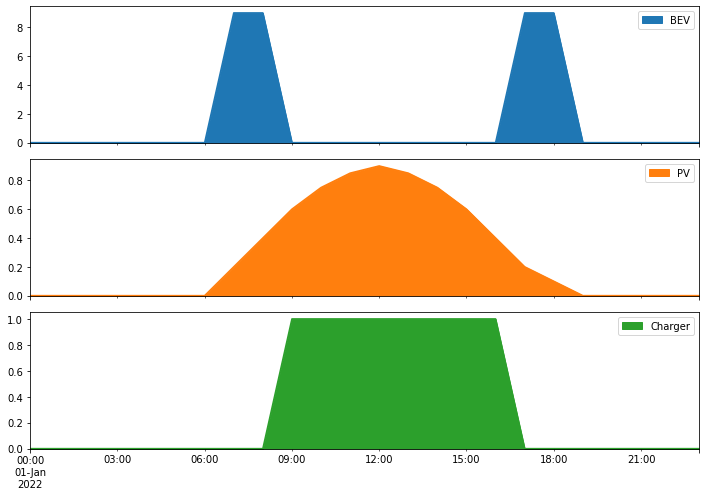

In [6]:
df = pd.concat({"BEV": bev_usage, "PV": pv_pu, "Charger": charger_p_max_pu}, axis=1)
df.plot.area(subplots=True, figsize=(10, 7))
plt.tight_layout()

Initialize the network

In [7]:
network = pypsa.Network()
network.set_snapshots(index)

network.add("Bus", "place of work", carrier="AC")

network.add("Bus", "battery", carrier="Li-ion")

network.add(
    "Generator",
    "PV panel",
    bus="place of work",
    p_nom_extendable=True,
    p_max_pu=pv_pu,
    capital_cost=1000.0,
)

network.add("Load", "driving", bus="battery", p_set=bev_usage)

network.add(
    "Link",
    "charger",
    bus0="place of work",
    bus1="battery",
    p_nom=120,  # super-charger with 120 kW
    p_max_pu=charger_p_max_pu,
    efficiency=0.9,
)


network.add("Store", "battery storage", bus="battery", e_cyclic=True, e_nom=100.0)

(<matplotlib.collections.PatchCollection at 0x7fbda05688e0>,
 <matplotlib.collections.LineCollection at 0x7fbda056d100>)

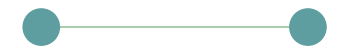

In [11]:
network.plot()

In [11]:
network.lopf()
print("Objective:", network.objective)

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `kirchhoff` formulation
INFO:pypsa.opf:Solving model using glpk
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 7017.54385964912
  Upper bound: 7017.54385964912
  Number of objectives: 1
  Number of constraints: 169
  Number of variables: 98
  Number of nonzeros: 277
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.01387166976928711
# ----------------------------------------------------------
#   Solution Information
# ----------

/home/dj4t9n/.local/lib/python3.9/site-packages/pypsa/opf.py:1293: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat({c.name:


The optimal panel size in kW is

In [61]:
network.generators.p_nom_opt["PV panel"]

7.01754385964912

<AxesSubplot:xlabel='snapshot'>

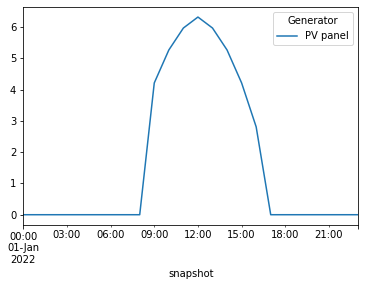

In [67]:
network.generators_t.p.plot()

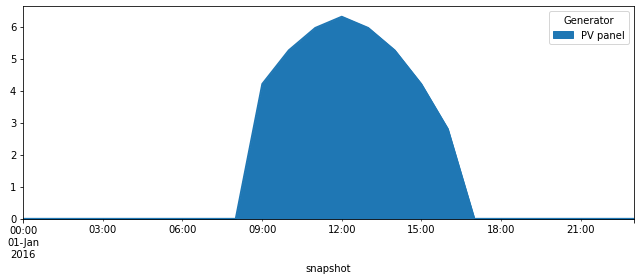

In [9]:
network.generators_t.p.plot.area(figsize=(9, 4))
plt.tight_layout()

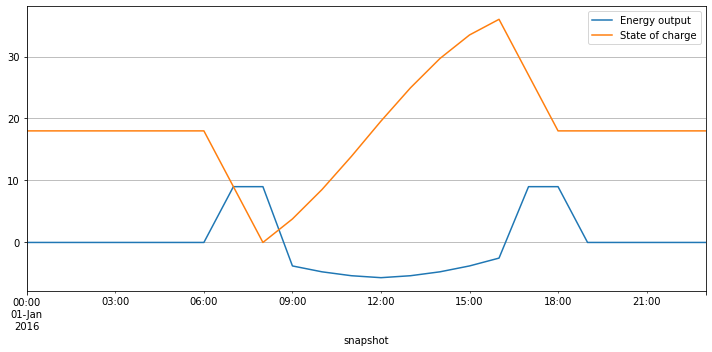

In [10]:
df = pd.DataFrame(
    {attr: network.stores_t[attr]["battery storage"] for attr in ["p", "e"]}
)
df.plot(grid=True, figsize=(10, 5))
plt.legend(labels=["Energy output", "State of charge"])
plt.tight_layout()

The losses in kWh per pay are:

In [69]:
(
    network.generators_t.p.loc[:, "PV panel"].sum()
    - network.loads_t.p.loc[:, "driving"].sum()
)

3.9999999999999716

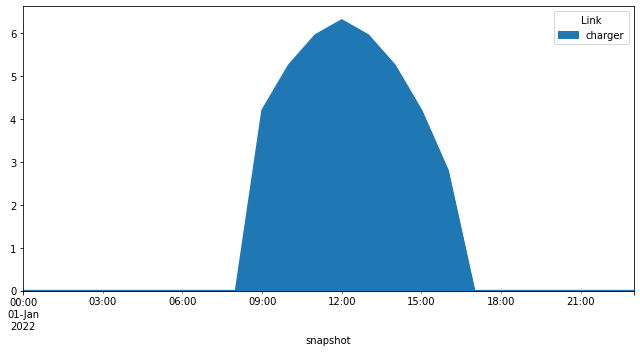

In [68]:
network.links_t.p0.plot.area(figsize=(9, 5))
plt.tight_layout()